<a href="https://colab.research.google.com/github/poojaanbu0/-Implementation-of-Logistic-Regression-Using-Gradient-Descent/blob/main/Clustering_Assisngments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/google_review_ratings.csv")
data

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5450,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5451,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5452,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [ ]:
data.head(5)

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.isnull().sum()

User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [ ]:
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,...,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,...,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5454 non-null   object 
 1   Category 1   5454 non-null   float64
 2   Category 2   5454 non-null   float64
 3   Category 3   5454 non-null   float64
 4   Category 4   5454 non-null   float64
 5   Category 5   5454 non-null   float64
 6   Category 6   5454 non-null   float64
 7   Category 7   5454 non-null   float64
 8   Category 8   5454 non-null   float64
 9   Category 9   5454 non-null   float64
 10  Category 10  5454 non-null   float64
 11  Category 12  5454 non-null   float64
 12  Category 13  5454 non-null   float64
 13  Category 14  5454 non-null   float64
 14  Category 15  5454 non-null   float64
 15  Category 16  5454 non-null   float64
 16  Category 17  5454 non-null   float64
 17  Category 18  5454 non-null   float64
 18  Category 19  5454 non-null   float64
 19  Catego

In [ ]:
x = data.iloc[:,1:]
x.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=30)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
wcss

[205180.62250339193,
 174829.25170247513,
 156964.6177430097,
 142374.61998417156,
 133357.06097058853,
 126776.42742601901,
 121645.75780674137,
 117699.90495303518,
 113492.52357204785,
 109619.19936783658,
 107256.51380241981,
 103694.3003212963,
 101783.51549019988,
 99594.2123725341]

Text(0.5, 0, 'No. of clusters')

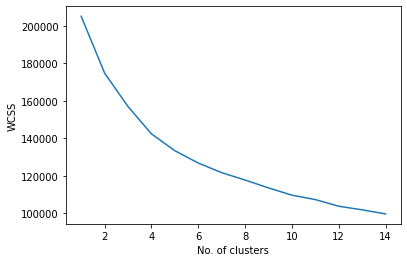

In [ ]:
plt.plot(range(1,15),wcss)
plt.ylabel("WCSS")
plt.xlabel("No. of clusters")

In [ ]:
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=30)
kmeans.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 4, 0, 4], dtype=int32)

In [ ]:
x["No_of_clusters"] = kmeans.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y =kmeans.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
x.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,No_of_clusters
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
kmeans.cluster_centers_[:, 1]

array([2.67823784, 1.53363536, 2.23886212, 2.89971503, 1.97947487])

In [ ]:
kmeans.cluster_centers_[:, 0]

array([2.34886486, 0.93243094, 1.64978581, 1.38880829, 1.16007502])

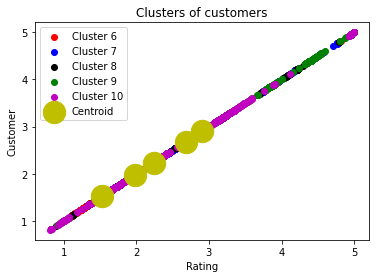

In [ ]:
plt.scatter(x[x["No_of_clusters"]==0]["Category 6"], x[x["No_of_clusters"]==0]["Category 6"], c = 'red', label = 'Cluster 6')
plt.scatter(x[x["No_of_clusters"]==1]["Category 7"], x[x["No_of_clusters"]==1]["Category 7"], c = 'b', label = 'Cluster 7')
plt.scatter(x[x["No_of_clusters"]==2]["Category 8"], x[x["No_of_clusters"]==2]["Category 8"], c = 'k', label = 'Cluster 8')
plt.scatter(x[x["No_of_clusters"]==3]["Category 9"], x[x["No_of_clusters"]==3]["Category 9"], c = 'g', label = 'Cluster 9')
plt.scatter(x[x["No_of_clusters"]==4]["Category 10"], x[x["No_of_clusters"]==4]["Category 10"], c = 'm', label = 'Cluster 10')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,1],c="y",s=500,label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Rating')
plt.ylabel('Customer')
plt.legend()
plt.show()

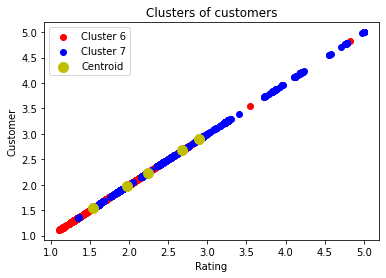

In [ ]:
plt.scatter(x[x["No_of_clusters"]==0]["Category 6"], x[x["No_of_clusters"]==0]["Category 6"], c = 'red', label = 'Cluster 6')
plt.scatter(x[x["No_of_clusters"]==1]["Category 7"], x[x["No_of_clusters"]==1]["Category 7"], c = 'b', label = 'Cluster 7')

plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,1],c="y",s=100,label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Rating')
plt.ylabel('Customer')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x["No_of_clusters"] = y_hc

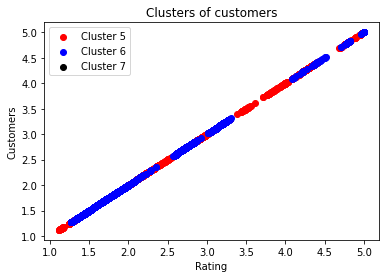

In [ ]:
plt.scatter(x[x["No_of_clusters"]==0]["Category 5"], x[x["No_of_clusters"]==0]["Category 5"], c = 'red', label = 'Cluster 5')
plt.scatter(x[x["No_of_clusters"]==1]["Category 6"], x[x["No_of_clusters"]==1]["Category 6"], c = 'b', label = 'Cluster 6')
plt.scatter(x[x["No_of_clusters"]==2]["Category 7"], x[x["No_of_clusters"]==2]["Category 7"], c = 'k', label = 'Cluster 7')

plt.title('Clusters of customers')
plt.xlabel('Rating')
plt.ylabel('Customers')
plt.legend()
plt.show()

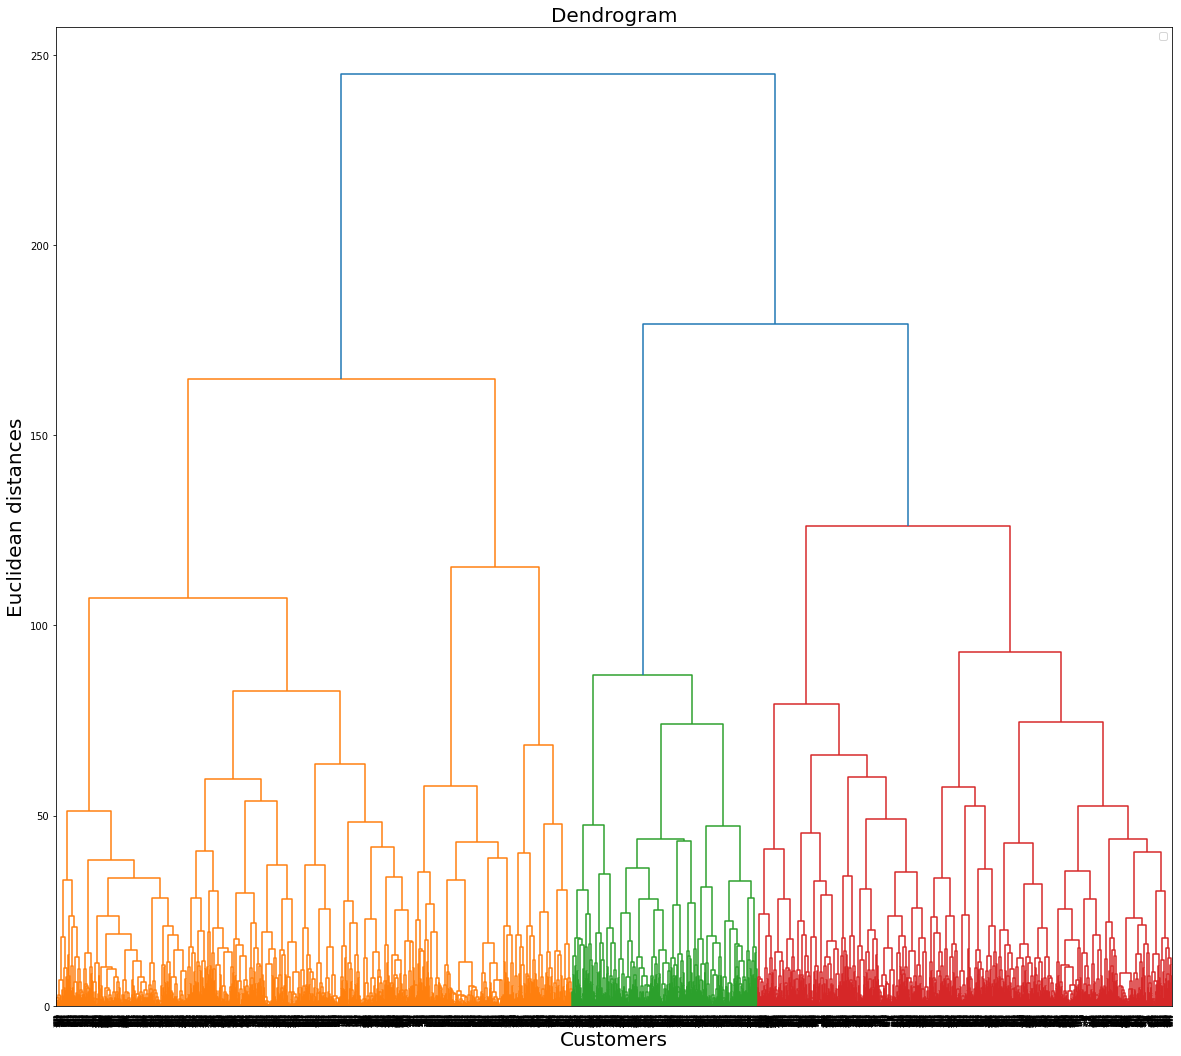

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,18))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distances',fontsize=20)
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x["No_of_clusters"] = y_hc

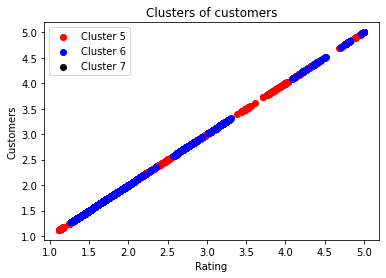

In [ ]:
plt.scatter(x[x["No_of_clusters"]==0]["Category 5"], x[x["No_of_clusters"]==0]["Category 5"], c = 'red', label = 'Cluster 5')
plt.scatter(x[x["No_of_clusters"]==1]["Category 6"], x[x["No_of_clusters"]==1]["Category 6"], c = 'b', label = 'Cluster 6')
plt.scatter(x[x["No_of_clusters"]==2]["Category 7"], x[x["No_of_clusters"]==2]["Category 7"], c = 'k', label = 'Cluster 7')
plt.title('Clusters of customers')
plt.xlabel('Rating')
plt.ylabel('Customers')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
km2= KMeans(n_clusters=2)
km2.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
predicted_cluster2 = km2.predict(x)
predicted_cluster2

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
x.head(5)

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,No_of_clusters,predicted_cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1


In [ ]:
x ["predicted_cluster"].value_counts()

0    2836
1    2618
Name: predicted_cluster, dtype: int64

In [ ]:
x ["predicted_cluster"].mean()

0.48001466813348004

In [ ]:
x.groupby(["predicted_cluster"]).mean().T

predicted_cluster,0,1
Category 1,1.779605,1.104920
Category 2,2.670635,1.940267
Category 3,3.000585,1.934939
Category 4,3.431449,2.109935
Category 5,3.587969,2.277456
Category 6,3.068685,2.703568
Category 7,2.835120,3.910829
Category 8,2.084542,3.035837
Category 9,2.373745,3.942024
Category 10,2.233385,3.481910


In [ ]:
km2.inertia_

175589.2010543309